# Baseline Model - Cleaning the Datasets

## Load, Explore and Preprocess Historical Carbon Credit Prices

In [2]:
import pandas as pd

In [3]:
historical_prices = pd.read_csv('historical_prices.csv')

##### Load and inspect the data: 
Here we load the histrocial carbon credit price data and inspect its structure using 'head()', 'info()' and 'describe()' functions. This helps us understand the data types and indentofy any immediate issues such as missing vaues or incorrect data types.

In [4]:
#returns the first few rows of the dataset
print(historical_prices.head())

         Date  Price   Open   High    Low    Vol. Change %
0  28/06/2024  67.36  66.71  68.40  65.79  22.06K    1.31%
1  27/06/2024  66.49  67.03  67.78  66.42  19.50K   -1.10%
2  26/06/2024  67.23  68.35  69.09  66.80  22.83K   -0.84%
3  25/06/2024  67.80  67.45  68.07  66.85  20.56K    0.36%
4  24/06/2024  67.56  68.02  68.27  67.01  25.78K   -0.72%


In [5]:
#check the structure and summary of the data
print(historical_prices.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1393 non-null   object 
 1   Price     1393 non-null   float64
 2   Open      1393 non-null   float64
 3   High      1393 non-null   float64
 4   Low       1393 non-null   float64
 5   Vol.      1387 non-null   object 
 6   Change %  1393 non-null   object 
dtypes: float64(4), object(3)
memory usage: 76.3+ KB
None


In [6]:
#check the structure and summary of the data
print(historical_prices.describe())

             Price         Open         High          Low
count  1393.000000  1393.000000  1393.000000  1393.000000
mean     55.691414    55.678076    56.623467    54.727452
std      25.609011    25.645751    26.186333    25.068633
min      16.120000    15.600000    16.380000    15.150000
25%      27.300000    27.300000    27.580000    27.030000
50%      58.940000    59.000000    60.260000    57.970000
75%      80.650000    80.700000    82.170000    79.320000
max      98.010000    98.500000    99.220000    96.720000


#### Chek for missing values:
We check for missing values in the dataset using 'isnull().sum()'. Identifying missing values early on helps us decide on the best approach to handle them, whether it be imputation or removal.

In [7]:
#checks for missiing values
print(historical_prices.isnull().sum())

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        6
Change %    0
dtype: int64


Since we have missing values in the 'Vol.' column, we must be able to handle this. Interpolation is a good method as it considers trends before and after the missing value to provode a more accurate estimate. This may not work as the missing values may be at the start or end of the series where interpolation does not have enough data points to estimate the value, therefore i will use forward filling and possibly backward filling forward filling does not handle te missing values.

#### Handling missing values:

In [8]:
#handle missing values in 'Vol.' column by forward filling
historical_prices['Vol.'] = historical_prices['Vol.'].fillna(method='ffill')


In [9]:
#convert the 'Date' column to datetime format
historical_prices['Date'] = pd.to_datetime(historical_prices['Date'], dayfirst=True)

#### Feature engineering:
1) Date conversion: changing the column from a string format to a 'datetime' object, allows us to easily extract components of the date, like the day of the week, month and quarter.

2) Day of the Week: this feature represents the day of the week for each date, where Monday is 0 and Sunday is 6. It helps identify any weekly patterns in the price changes.

3) Month: this feature indicates the month (1 for January, 2 for February, etc.) and can be used to detect seasonal trends in the price data.

4) Qurter: this feature divides the year into four quarters. It can help identify broader seasonal effects on prices over a three-month period.

5) this feature calculates the percentage change in price from the previous day. It provides insight into daily price volatility and is useful for detecting trends and anomalies in price movements.

In [10]:
#extract additional features
historical_prices['DayOfWeek'] = historical_prices['Date'].dt.dayofweek
historical_prices['Month'] = historical_prices['Date'].dt.month
historical_prices['Quarter'] = historical_prices['Date'].dt.quarter

#calculate daily change percentage
historical_prices['DailyChange'] = historical_prices['Price'].pct_change() * 100

#drop rows with NaN values in 'DailyChange' column
historical_prices.dropna(subset=['DailyChange'], inplace=True)

In [11]:
#feature engineering: rolling average
historical_prices['Price_MA_7'] = historical_prices['Price'].rolling(window=7).mean()

#drop any remaining NaN values from rolling mean
historical_prices.dropna(inplace=True)

In [12]:
#select important features including Date
selected_features = ['Date', 'Low', 'High', 'Open', 'DailyChange', 'Price_MA_7']
final_historical_prices = historical_prices[selected_features]

#save the cleaned data to a new CSV file
final_historical_prices.to_csv('cleaned_historical_prices_with_date.csv', index=False)

print(final_historical_prices.head())

         Date    Low   High   Open  DailyChange  Price_MA_7
7  2024-06-19  68.50  70.81  68.74     2.240208   68.151429
8  2024-06-18  67.72  69.25  68.26    -3.336161   68.421429
9  2024-06-17  67.63  69.21  68.70    -0.321732   68.554286
10 2024-06-14  68.18  71.09  70.75     0.542840   68.658571
11 2024-06-13  70.30  71.99  70.30     3.414563   69.131429


## Load, Explore and Preprocess Economic Indicators

### 1) GDP Growth Rates

In [18]:
#load the GDP Growth Rates dataset
gdp_growth_rates = pd.read_csv('gdp_growth_rates.csv')

In [19]:
#display the first few rows to understand the structure
print(gdp_growth_rates.head())

  Country Name         Indicator Name      2019       2020      2021  \
0      Albania  GDP growth (annual %)  2.087712  -3.302082  8.908528   
1      Andorra  GDP growth (annual %)  2.015548 -11.183940  8.287200   
2      Austria  GDP growth (annual %)  1.450529  -6.632991  4.237867   
3      Belgium  GDP growth (annual %)  2.240835  -5.304473  6.927984   
4     Bulgaria  GDP growth (annual %)  4.035189  -3.966156  7.661748   

       2022      2023  
0  4.856402  3.439149  
1  9.563798  1.444184  
2  4.806430 -0.828815  
3  3.014722  1.365055  
4  3.926432  1.846390  


We will handle any missing within the dataset, if there are any, we can tackle this issue by using forward and backward fill. 

In [20]:
# Check for missing values
print("\nMissing values in each column:")
print(gdp_growth_rates.isnull().sum())


Missing values in each column:
Country Name      0
Indicator Name    0
2019              1
2020              1
2021              1
2022              2
2023              3
dtype: int64


In [21]:
#handles missing values - using forward fill in this case
gdp_growth_rates.fillna(method='ffill', inplace=True)

#ensures that there are no remaining missing values
print("\nMissing values after handling:")
print(gdp_growth_rates.isnull().sum())


Missing values after handling:
Country Name      0
Indicator Name    0
2019              0
2020              0
2021              0
2022              0
2023              0
dtype: int64


In [22]:
#handles any remaining missing values using backward fill
gdp_growth_rates.fillna(method='bfill', inplace=True)

#ensures that there are no remaining missing values
print("\nMissing values after handling with backward fill:")
print(gdp_growth_rates.isnull().sum())


Missing values after handling with backward fill:
Country Name      0
Indicator Name    0
2019              0
2020              0
2021              0
2022              0
2023              0
dtype: int64


Even after applying forward fill, with the addition of backward fill, we ensure that we have removed all missing values from the dataset.

In [23]:
#check data types
print(gdp_growth_rates.dtypes)

Country Name       object
Indicator Name     object
2019              float64
2020              float64
2021              float64
2022              float64
2023              float64
dtype: object


#### Data Cleaning and Transformation on GDP Growth Rates

Here, we are handling outliers identified using box plots, as shown below.

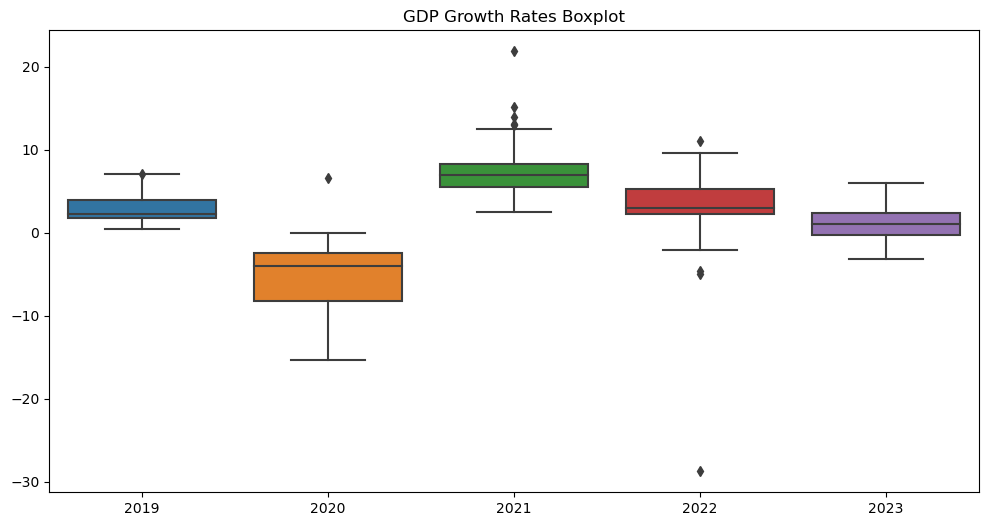

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

#visualize outliers using a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=gdp_growth_rates.drop(columns=['Country Name', 'Indicator Name']))
plt.title('GDP Growth Rates Boxplot')
plt.show()

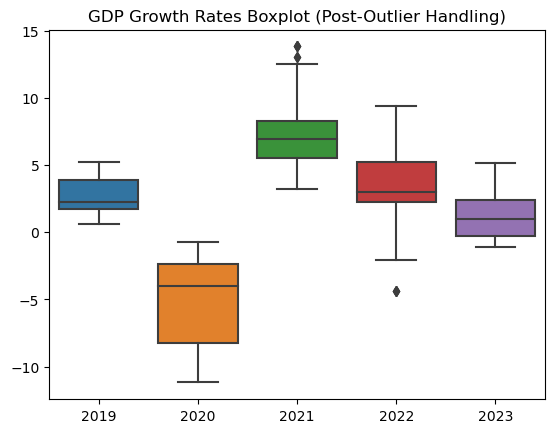

In [25]:
#caps outliers to 5th and 95th percentiles
for year in ['2019', '2020', '2021', '2022', '2023']:
    lower_bound = gdp_growth_rates[year].quantile(0.05)
    upper_bound = gdp_growth_rates[year].quantile(0.95)
    gdp_growth_rates[year] = gdp_growth_rates[year].clip(lower=lower_bound, upper=upper_bound)

#check again for any remaining outliers
sns.boxplot(data=gdp_growth_rates.drop(columns=['Country Name', 'Indicator Name']))
plt.title('GDP Growth Rates Boxplot (Post-Outlier Handling)')
plt.show()

#### Feature engineering for GDP Growth Rates:

In [26]:
#create lag features for each year
for year in ['2020', '2021', '2022', '2023']:
    gdp_growth_rates[f'Lag_{year}'] = gdp_growth_rates[year].shift(1)

#create rolling mean features for each year
for year in ['2019', '2020', '2021', '2022', '2023']:
    gdp_growth_rates[f'Rolling_Mean_{year}'] = gdp_growth_rates[year].rolling(window=2).mean()

#drop any rows with NaN values resulting from lag/rolling mean operations
gdp_growth_rates.dropna(inplace=True)

#check the dataset after feature engineering
print(gdp_growth_rates.head())

             Country Name         Indicator Name      2019       2020  \
1                 Andorra  GDP growth (annual %)  2.015548 -11.182276   
2                 Austria  GDP growth (annual %)  1.450529  -6.632991   
3                 Belgium  GDP growth (annual %)  2.240835  -5.304473   
4                Bulgaria  GDP growth (annual %)  4.035189  -3.966156   
5  Bosnia and Herzegovina  GDP growth (annual %)  2.887343  -3.015095   

       2021      2022      2023   Lag_2020  Lag_2021  Lag_2022  Lag_2023  \
1  8.287200  9.377851  1.444184  -3.302082  8.908528  4.856402  3.439149   
2  4.237867  4.806430 -0.828815 -11.182276  8.287200  9.377851  1.444184   
3  6.927984  3.014722  1.365055  -6.632991  4.237867  4.806430 -0.828815   
4  7.661748  3.926432  1.846390  -5.304473  6.927984  3.014722  1.365055   
5  7.389962  4.226811  1.676223  -3.966156  7.661748  3.926432  1.846390   

   Rolling_Mean_2019  Rolling_Mean_2020  Rolling_Mean_2021  Rolling_Mean_2022  \
1           2.051630   

We have created, for each year, a lag feature which represents the GDP growth rate from the previous year.

We have also calculated a rolling mean for each year with a window size of 2, which averages the current year and the previous year's GDP growth rates.

In [27]:
from sklearn.preprocessing import StandardScaler

#select only the numeric columns for standardization
numeric_columns = gdp_growth_rates.columns[2:]  # Excluding 'Country Name' and 'Indicator Name'

#initialize the standard scaler
scaler = StandardScaler()

#fit and transform the numeric columns
gdp_growth_rates[numeric_columns] = scaler.fit_transform(gdp_growth_rates[numeric_columns])

#check the dataset after standardization
print(gdp_growth_rates.head())

             Country Name         Indicator Name      2019      2020  \
1                 Andorra  GDP growth (annual %) -0.518081 -1.800499   
2                 Austria  GDP growth (annual %) -0.933466 -0.441804   
3                 Belgium  GDP growth (annual %) -0.352456 -0.045028   
4                Bulgaria  GDP growth (annual %)  0.966701  0.354675   
5  Bosnia and Herzegovina  GDP growth (annual %)  0.122838  0.638720   

       2021      2022      2023  Lag_2020  Lag_2021  Lag_2022  Lag_2023  \
1  0.358831  1.758055  0.078423  0.548952  0.534069  0.400514  1.277352   
2 -1.011839  0.425182 -1.202091 -1.800912  0.320169  1.806643  0.106020   
3 -0.101254 -0.097220  0.033845 -0.444321 -1.073863  0.384973 -1.228558   
4  0.147120  0.168604  0.305009 -0.048158 -0.147757 -0.172232  0.059560   
5  0.055123  0.256184  0.209144  0.350926  0.104850  0.111302  0.342173   

   Rolling_Mean_2019  Rolling_Mean_2020  Rolling_Mean_2021  Rolling_Mean_2022  \
1          -0.639109          -0.81

In [28]:
#save the cleaned dataset
gdp_growth_rates.to_csv('cleaned_gdp_growth_rates.csv', index=False)

### 2) Inflation Rates

#### Load and inspect the dataset

In [29]:
#import necessary libraries
import pandas as pd

#load the inflation rates dataset
inflation_rates = pd.read_csv('inflation_rates.csv')

#display the first few rows of the dataset to understand its structure
print(inflation_rates.head())

#check the structure and summary of the data
print(inflation_rates.info())

print(inflation_rates.describe())

             Country Name                         Indicator Name      2019  \
0                 Andorra  Inflation, consumer prices (annual %)       NaN   
1                 Austria  Inflation, consumer prices (annual %)  1.530896   
2                 Belgium  Inflation, consumer prices (annual %)  1.436820   
3                Bulgaria  Inflation, consumer prices (annual %)  3.103729   
4  Bosnia and Herzegovina  Inflation, consumer prices (annual %)       NaN   

       2020      2021       2022      2023  
0       NaN       NaN        NaN       NaN  
1  1.381911  2.766667   8.546870  7.814134  
2  0.740792  2.440249   9.597512  4.049011  
3  1.672441  3.297744  15.325259  9.442841  
4       NaN       NaN        NaN       NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    42 non-null     object 
 1   Indicator Name  42 

#### Handling missing values

In [30]:
#check for missing values
print("\nMissing values in each column:")
print(inflation_rates.isnull().sum())

#handle missing values by filling them using forward and backward fill
inflation_rates.fillna(method='ffill', inplace=True)  # Forward fill
inflation_rates.fillna(method='bfill', inplace=True)  # Backward fill

#ensure that there are no remaining missing values
print("\nMissing values after handling:")
print(inflation_rates.isnull().sum())


Missing values in each column:
Country Name      0
Indicator Name    0
2019              5
2020              5
2021              5
2022              6
2023              6
dtype: int64

Missing values after handling:
Country Name      0
Indicator Name    0
2019              0
2020              0
2021              0
2022              0
2023              0
dtype: int64


In [31]:
print(inflation_rates.head())

             Country Name                         Indicator Name      2019  \
0                 Andorra  Inflation, consumer prices (annual %)  1.530896   
1                 Austria  Inflation, consumer prices (annual %)  1.530896   
2                 Belgium  Inflation, consumer prices (annual %)  1.436820   
3                Bulgaria  Inflation, consumer prices (annual %)  3.103729   
4  Bosnia and Herzegovina  Inflation, consumer prices (annual %)  3.103729   

       2020      2021       2022      2023  
0  1.381911  2.766667   8.546870  7.814134  
1  1.381911  2.766667   8.546870  7.814134  
2  0.740792  2.440249   9.597512  4.049011  
3  1.672441  3.297744  15.325259  9.442841  
4  1.672441  3.297744  15.325259  9.442841  


#### Visualise the data for outliers

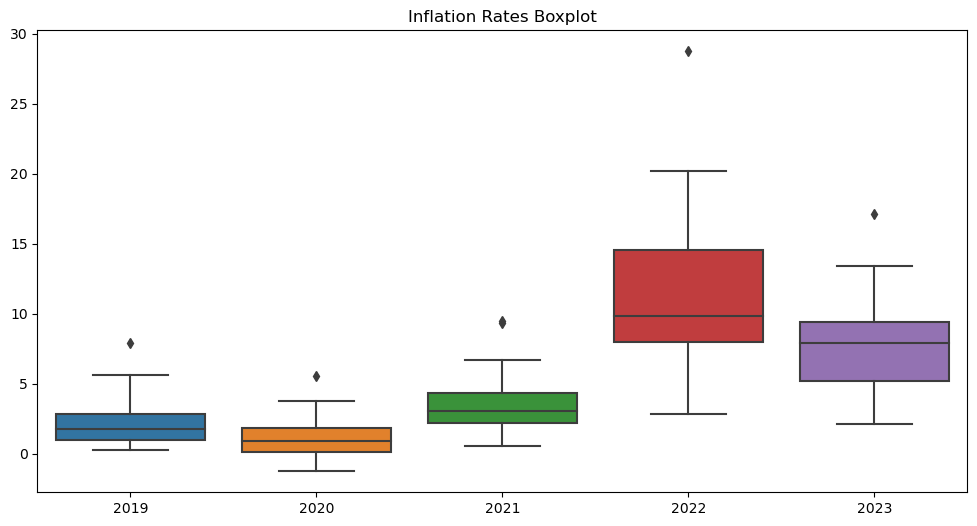

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

#visualize outliers using a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=inflation_rates.drop(columns=['Country Name', 'Indicator Name']))
plt.title('Inflation Rates Boxplot')
plt.show()

#### Handling outliers

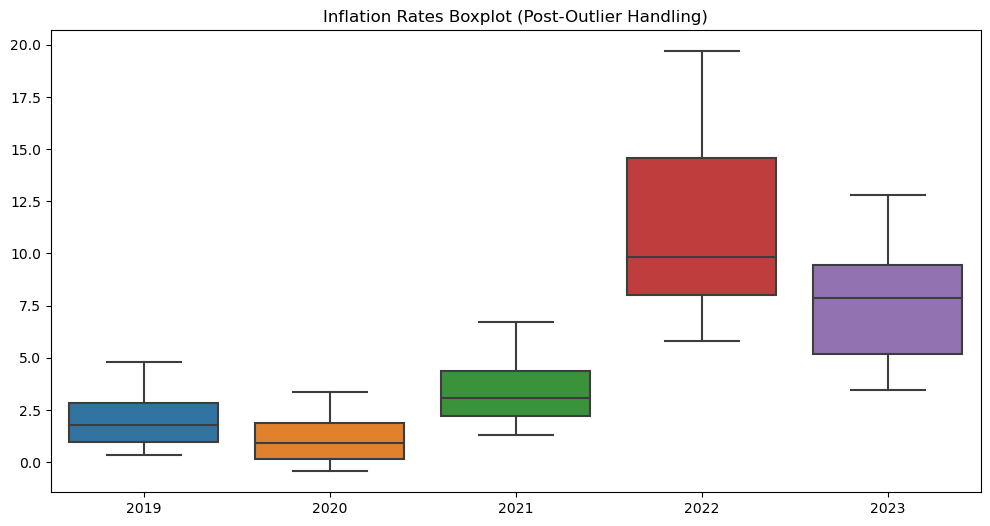

In [33]:
#cap outliers to the 5th and 95th percentiles
for year in ['2019', '2020', '2021', '2022', '2023']:
    lower_bound = inflation_rates[year].quantile(0.05)
    upper_bound = inflation_rates[year].quantile(0.95)
    inflation_rates[year] = inflation_rates[year].clip(lower=lower_bound, upper=upper_bound)

#check again for any remaining outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=inflation_rates.drop(columns=['Country Name', 'Indicator Name']))
plt.title('Inflation Rates Boxplot (Post-Outlier Handling)')
plt.show()

#### Performing feature engineering

In [34]:
#create lag features for each year
for year in ['2020', '2021', '2022', '2023']:
    inflation_rates[f'Lag_{year}'] = inflation_rates[year].shift(1)

#create rolling mean features for each year
for year in ['2019', '2020', '2021', '2022', '2023']:
    inflation_rates[f'Rolling_Mean_{year}'] = inflation_rates[year].rolling(window=2).mean()

#drop any rows with NaN values resulting from lag/rolling mean operations
inflation_rates.dropna(inplace=True)

#check the dataset after feature engineering
print(inflation_rates.head())

             Country Name                         Indicator Name      2019  \
1                 Austria  Inflation, consumer prices (annual %)  1.530896   
2                 Belgium  Inflation, consumer prices (annual %)  1.436820   
3                Bulgaria  Inflation, consumer prices (annual %)  3.103729   
4  Bosnia and Herzegovina  Inflation, consumer prices (annual %)  3.103729   
5                 Belarus  Inflation, consumer prices (annual %)  4.819413   

       2020      2021       2022      2023  Lag_2020  Lag_2021   Lag_2022  \
1  1.381911  2.766667   8.546870  7.814134  1.381911  2.766667   8.546870   
2  0.740792  2.440249   9.597512  4.049011  1.381911  2.766667   8.546870   
3  1.672441  3.297744  15.325259  9.442841  0.740792  2.440249   9.597512   
4  1.672441  3.297744  15.325259  9.442841  1.672441  3.297744  15.325259   
5  3.381659  6.694459  15.209675  5.000599  1.672441  3.297744  15.325259   

   Lag_2023  Rolling_Mean_2019  Rolling_Mean_2020  Rolling_Mean_2021

#### Standardise the data

In [35]:
from sklearn.preprocessing import StandardScaler

#select only the numeric columns for standardization
numeric_columns = inflation_rates.columns[2:]  # Excluding 'Country Name' and 'Indicator Name'

#initialize the standard scaler
scaler = StandardScaler()

#fit and transform the numeric columns
inflation_rates[numeric_columns] = scaler.fit_transform(inflation_rates[numeric_columns])

#check the dataset after standardization
print(inflation_rates.head())

             Country Name                         Indicator Name      2019  \
1                 Austria  Inflation, consumer prices (annual %) -0.428176   
2                 Belgium  Inflation, consumer prices (annual %) -0.498956   
3                Bulgaria  Inflation, consumer prices (annual %)  0.755179   
4  Bosnia and Herzegovina  Inflation, consumer prices (annual %)  0.755179   
5                 Belarus  Inflation, consumer prices (annual %)  2.046009   

       2020      2021      2022      2023  Lag_2020  Lag_2021  Lag_2022  \
1  0.165506 -0.371651 -0.681054  0.044247  0.194350 -0.329274 -0.644749   
2 -0.328258 -0.582164 -0.436668 -1.258382  0.194350 -0.329274 -0.644749   
3  0.389261 -0.029150  0.895640  0.607735 -0.308401 -0.552970 -0.389719   
4  0.389261 -0.029150  0.895640  0.607735  0.422178  0.034677  1.000623   
5  1.705635  2.161450  0.868754 -0.929158  0.422178  0.034677  1.000623   

   Lag_2023  Rolling_Mean_2019  Rolling_Mean_2020  Rolling_Mean_2021  \
1  0.090

In [36]:
#save the cleaned dataset
inflation_rates.to_csv('cleaned_inflation_rates.csv', index=False)

### 3) Unemployment Rates

#### Load and inspect the dataset

In [39]:
#import necessary libraries
import pandas as pd

#load the unemployment rates dataset
unemployment_rates = pd.read_csv('unemployment_rates.csv')

#display the first few rows of the dataset to understand its structure
print(unemployment_rates.head())

#check the structure and summary of the data
print(unemployment_rates.info())
print(unemployment_rates.describe())

             Country Name                                     Indicator Name  \
0                 Austria  Unemployment, total (% of total labor force) (...   
1                 Belgium  Unemployment, total (% of total labor force) (...   
2                Bulgaria  Unemployment, total (% of total labor force) (...   
3  Bosnia and Herzegovina  Unemployment, total (% of total labor force) (...   
4                 Belarus  Unemployment, total (% of total labor force) (...   

     2019    2020    2021    2022    2023  
0   4.560   5.201   6.459   4.992   5.243  
1   5.360   5.555   6.264   5.558   5.508  
2   4.230   5.125   5.267   4.268   4.295  
3  15.692  15.868  14.897  12.657  10.420  
4   4.165   4.049   3.900   3.574   3.574  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    41 non-null     object 
 1   Indicator Nam

#### Check for missing values

In [40]:
#check for missing values
print("\nMissing values in each column:")
print(unemployment_rates.isnull().sum())


Missing values in each column:
Country Name      0
Indicator Name    0
2019              3
2020              3
2021              3
2022              4
2023              4
dtype: int64


In [41]:
#handle missing values - using forward fill
unemployment_rates.fillna(method='ffill', inplace=True)

#ensure that there are no remaining missing values
print("\nMissing values after handling:")
print(unemployment_rates.isnull().sum())


Missing values after handling:
Country Name      0
Indicator Name    0
2019              0
2020              0
2021              0
2022              0
2023              0
dtype: int64


#### Check for outliers

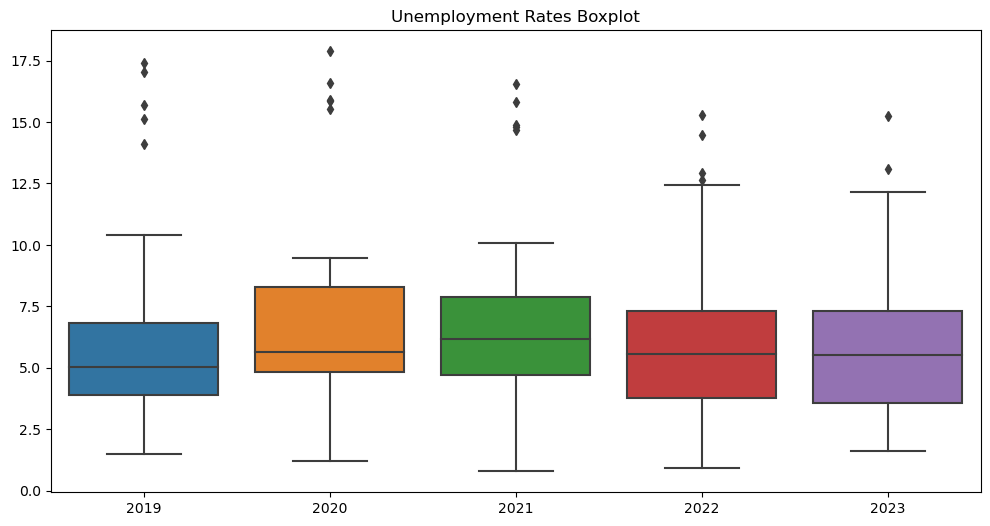

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

#visualize outliers using a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=unemployment_rates.drop(columns=['Country Name', 'Indicator Name']))
plt.title('Unemployment Rates Boxplot')
plt.show()

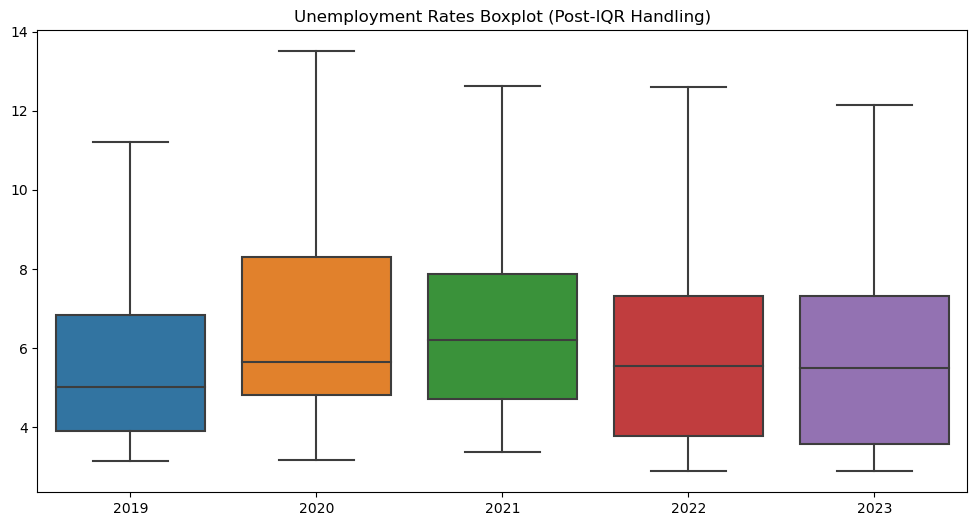

In [44]:
#calculate the IQR for each year and apply outlier removal
for year in ['2019', '2020', '2021', '2022', '2023']:
    Q1 = unemployment_rates[year].quantile(0.25)
    Q3 = unemployment_rates[year].quantile(0.75)
    IQR = Q3 - Q1
    
    #define bounds for identifying outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    #cap values beyond the bounds
    unemployment_rates[year] = unemployment_rates[year].clip(lower=lower_bound, upper=upper_bound)

#check again for any remaining outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=unemployment_rates.drop(columns=['Country Name', 'Indicator Name']))
plt.title('Unemployment Rates Boxplot (Post-IQR Handling)')
plt.show()

#### Feature Engineering

In [45]:
#create lag features for each year
for year in ['2020', '2021', '2022', '2023']:
    unemployment_rates[f'Lag_{year}'] = unemployment_rates[year].shift(1)

#create rolling mean features for each year
for year in ['2019', '2020', '2021', '2022']:
    unemployment_rates[f'Rolling_Mean_{year}'] = unemployment_rates[year].rolling(window=2).mean()

#drop any rows with NaN values resulting from Lag/rolling mean operations
unemployment_rates.dropna(inplace=True)

#check the dataset after feature engineering
print(unemployment_rates.head())

             Country Name                                     Indicator Name  \
1                 Belgium  Unemployment, total (% of total labor force) (...   
2                Bulgaria  Unemployment, total (% of total labor force) (...   
3  Bosnia and Herzegovina  Unemployment, total (% of total labor force) (...   
4                 Belarus  Unemployment, total (% of total labor force) (...   
5             Switzerland  Unemployment, total (% of total labor force) (...   

      2019    2020     2021     2022    2023  Lag_2020  Lag_2021  Lag_2022  \
1   5.3600   5.555   6.2640   5.5580   5.508     5.201    6.4590    4.9920   
2   4.2300   5.125   5.2670   4.2680   4.295     5.555    6.2640    5.5580   
3  11.2145  13.502  12.6125  12.5865  10.420     5.125    5.2670    4.2680   
4   4.1650   4.049   3.9000   3.5740   3.574    13.502   12.6125   12.5865   
5   4.3940   4.817   5.0970   4.3000   4.050     4.049    3.9000    3.5740   

   Lag_2023  Rolling_Mean_2019  Rolling_Mean_2020 

#### Standardisation

In [46]:
from sklearn.preprocessing import StandardScaler

#select only the numeric columns for standardization
numeric_columns = unemployment_rates.columns[2:]  # Excluding 'Country Name' and 'Indicator Name'

#initialize the standard scaler
scaler = StandardScaler()

#fit and transform the numeric columns
unemployment_rates[numeric_columns] = scaler.fit_transform(unemployment_rates[numeric_columns])

#check the dataset after standardization
print(unemployment_rates.head())

             Country Name                                     Indicator Name  \
1                 Belgium  Unemployment, total (% of total labor force) (...   
2                Bulgaria  Unemployment, total (% of total labor force) (...   
3  Bosnia and Herzegovina  Unemployment, total (% of total labor force) (...   
4                 Belarus  Unemployment, total (% of total labor force) (...   
5             Switzerland  Unemployment, total (% of total labor force) (...   

       2019      2020      2021      2022      2023  Lag_2020  Lag_2021  \
1 -0.272513 -0.475930 -0.195695 -0.165638 -0.164066 -0.559959 -0.099374   
2 -0.690774 -0.617676 -0.544467 -0.603447 -0.616160 -0.442730 -0.168572   
3  1.894488  2.143739  2.025150  2.219742  1.666672 -0.585127 -0.522367   
4 -0.714834 -0.972371 -1.022674 -0.838981 -0.884881  2.188964  2.084258   
5 -0.630071 -0.719206 -0.603937 -0.592586 -0.707473 -0.941451 -1.007461   

   Lag_2022  Lag_2023  Rolling_Mean_2019  Rolling_Mean_2020  \
1 -0.

In [47]:
#save the cleaned dataset
unemployment_rates.to_csv('cleaned_unemployment_rates.csv', index=False)

### 4) Industrial Production Indices

#### Load and inspect the dataset

In [48]:
#load the industrial production indices dataset
industrial_production_indices = pd.read_csv('Industrial_Production_Indices.csv')

#display the first few rows to understand the structure
print(industrial_production_indices.head())

#check the structure and summary of the data
print(industrial_production_indices.info())
print(industrial_production_indices.describe())

  Country Name  Jul-23  Aug-23  Sep-23  Oct-23  Nov-23  Dec-23  Jan-24  \
0      Belgium    91.9    88.4    87.7    92.3    88.5    93.1    89.9   
1     Bulgaria   102.2   103.6   101.4   103.3    98.8   102.8    98.6   
2      Czechia    99.4    99.9    98.4   101.0    99.8   102.8    99.6   
3      Denmark   121.3   120.5   118.6   124.8   129.6   129.0   127.8   
4      Germany    96.2    96.0    95.2    95.0    95.3    93.3    94.2   

   Feb-24  Mar-24  Apr-24  May-24  Jun-24  
0    90.1    93.4    93.7    96.0     NaN  
1    98.8    98.4   101.2    97.8     NaN  
2   101.7   100.0   100.6    98.4     NaN  
3   129.3   126.1   139.3   132.5     NaN  
4    94.9    94.6    95.0    92.7     NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  33 non-null     object 
 1   Jul-23        33 non-null     float64
 2   Aug-23     

#### Handle missing values

In [49]:
#check for missing values
print("\nMissing values in each column:")
print(industrial_production_indices.isnull().sum())

#handle missing values
industrial_production_indices.fillna(method='ffill', inplace=True)
industrial_production_indices.fillna(method='bfill', inplace=True)

# Ensure there are no remaining missing values
print("\nMissing values after handling:")
print(industrial_production_indices.isnull().sum())


Missing values in each column:
Country Name     0
Jul-23           0
Aug-23           0
Sep-23           0
Oct-23           0
Nov-23           0
Dec-23           0
Jan-24           1
Feb-24           1
Mar-24           1
Apr-24           2
May-24           2
Jun-24          31
dtype: int64

Missing values after handling:
Country Name    0
Jul-23          0
Aug-23          0
Sep-23          0
Oct-23          0
Nov-23          0
Dec-23          0
Jan-24          0
Feb-24          0
Mar-24          0
Apr-24          0
May-24          0
Jun-24          0
dtype: int64


#### Handling outliers

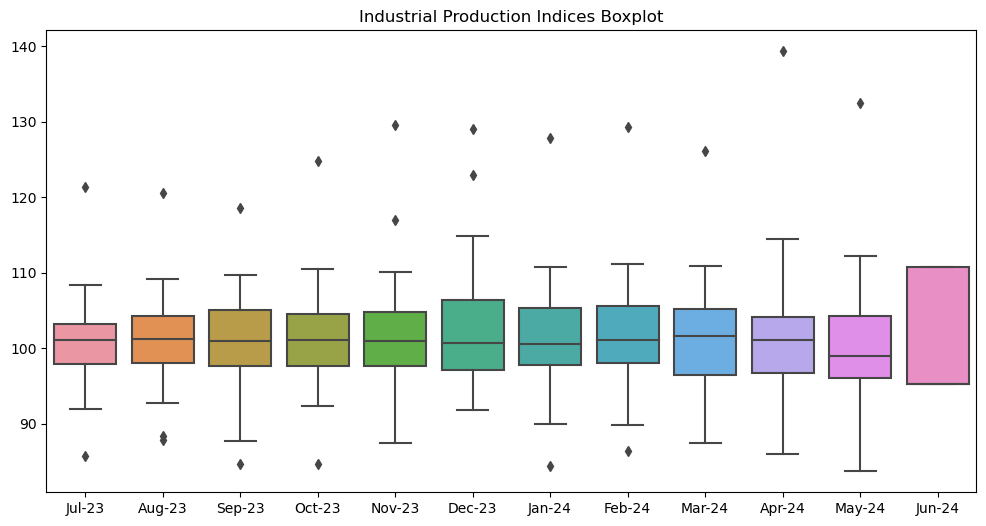

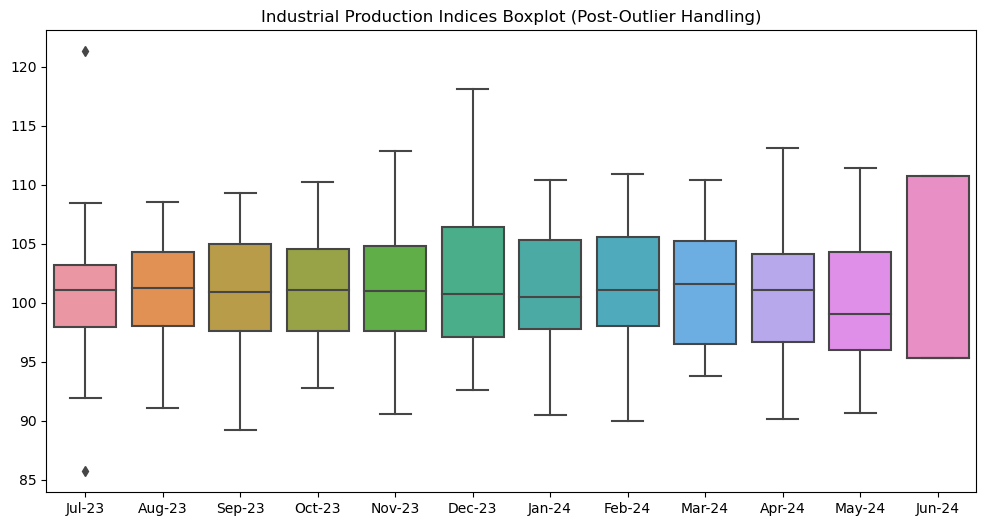

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

#visualize outliers using a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=industrial_production_indices.drop(columns=['Country Name']))
plt.title('Industrial Production Indices Boxplot')
plt.show()

#cap outliers to 5th and 95th percentiles
for column in industrial_production_indices.columns[2:]:  # Assuming first two columns are non-numeric
    lower_bound = industrial_production_indices[column].quantile(0.05)
    upper_bound = industrial_production_indices[column].quantile(0.95)
    industrial_production_indices[column] = industrial_production_indices[column].clip(lower=lower_bound, upper=upper_bound)

#check again for any remaining outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=industrial_production_indices.drop(columns=['Country Name']))
plt.title('Industrial Production Indices Boxplot (Post-Outlier Handling)')
plt.show()


#### Performing feature engineering

In [52]:
#lag features for each month
for column in industrial_production_indices.columns[1:]:  # Skip the first column if it's a non-numeric identifier like 'Country'
    industrial_production_indices[f'Lag_{column}'] = industrial_production_indices[column].shift(1)

#check the DataFrame after creating lag features
print(industrial_production_indices.head())


  Country Name  Jul-23  Aug-23  Sep-23  Oct-23  Nov-23  Dec-23  Jan-24  \
0      Belgium    91.9   91.04   89.20   92.72   90.54    93.1   90.44   
1     Bulgaria   102.2  103.60  101.40  103.30   98.80   102.8   98.60   
2      Czechia    99.4   99.90   98.40  101.00   99.80   102.8   99.60   
3      Denmark   121.3  108.54  109.28  110.20  112.82   118.1  110.38   
4      Germany    96.2   96.00   95.20   95.00   95.30    93.3   94.20   

   Feb-24  Mar-24  ...  Lag_Sep-23  Lag_Oct-23  Lag_Nov-23  Lag_Dec-23  \
0   90.10   93.76  ...         NaN         NaN         NaN         NaN   
1   98.80   98.40  ...       89.20       92.72       90.54        93.1   
2  101.70  100.00  ...      101.40      103.30       98.80       102.8   
3  110.92  110.42  ...       98.40      101.00       99.80       102.8   
4   94.90   94.60  ...      109.28      110.20      112.82       118.1   

   Lag_Jan-24  Lag_Feb-24  Lag_Mar-24  Lag_Apr-24  Lag_May-24  Lag_Jun-24  
0         NaN         NaN         

In [53]:
#create rolling mean and standard deviation features
for column in industrial_production_indices.columns[1:]:
    industrial_production_indices[f'Rolling_Mean_3_{column}'] = industrial_production_indices[column].rolling(window=3).mean()
    industrial_production_indices[f'Rolling_Std_3_{column}'] = industrial_production_indices[column].rolling(window=3).std()

#drop any rows with NaN values resulting from lag/rolling operations
industrial_production_indices.dropna(inplace=True)

#check the DataFrame after feature engineering
print(industrial_production_indices.head())

  Country Name  Jul-23  Aug-23  Sep-23  Oct-23  Nov-23  Dec-23  Jan-24  \
3      Denmark   121.3  108.54  109.28  110.20  112.82   118.1  110.38   
4      Germany    96.2   96.00   95.20   95.00   95.30    93.3   94.20   
5      Estonia    85.7   91.04   89.20   92.72   90.54    92.6   90.44   
6      Ireland   101.4  104.30  102.80   95.20  102.30   118.1   98.30   
7       Greece   104.9  105.90  103.60  110.00  105.50   106.4  110.10   

   Feb-24  Mar-24  ...  Rolling_Mean_3_Lag_Feb-24  Rolling_Std_3_Lag_Feb-24  \
3  110.92  110.42  ...                  96.866667                  6.036831   
4   94.90   94.60  ...                 103.806667                  6.328675   
5   89.98   93.76  ...                 102.506667                  8.040406   
6   93.40  103.40  ...                  98.600000                 10.949356   
7  108.10  106.40  ...                  92.760000                  2.521666   

   Rolling_Mean_3_Lag_Mar-24  Rolling_Std_3_Lag_Mar-24  \
3                  97.

#### Standardisation

In [54]:
from sklearn.preprocessing import StandardScaler

#select only the numeric columns for standardization
numeric_columns = industrial_production_indices.select_dtypes(include=[np.number]).columns

#initialize the standard scaler
scaler = StandardScaler()

#fit and transform the numeric columns
industrial_production_indices[numeric_columns] = scaler.fit_transform(industrial_production_indices[numeric_columns])

#check the dataset after standardization
print(industrial_production_indices.head())

  Country Name    Jul-23    Aug-23    Sep-23    Oct-23    Nov-23    Dec-23  \
3      Denmark  3.353273  1.586515  1.502722  1.819710  2.065751  2.303704   
4      Germany -0.857190 -1.090169 -1.052220 -1.251531 -1.050484 -1.202752   
5      Estonia -2.618539 -2.148889 -2.140974 -1.712217 -1.897133 -1.301725   
6      Ireland  0.015097  0.681480  0.326868 -1.211120  0.194587  2.303704   
7       Greece  0.602214  1.023003  0.472035  1.779299  0.763762  0.649449   

     Jan-24    Feb-24    Mar-24  ...  Rolling_Mean_3_Lag_Feb-24  \
3  1.694057  1.727805  1.632255  ...                  -1.297786   
4 -1.316910 -1.174618 -1.390251  ...                   1.001520   
5 -2.016616 -2.065998 -1.550738  ...                   0.570814   
6 -0.553934 -1.446380  0.291042  ...                  -0.723512   
7  1.641951  1.216892  0.864210  ...                  -2.658375   

   Rolling_Std_3_Lag_Feb-24  Rolling_Mean_3_Lag_Mar-24  \
3                  0.526703                  -1.530419   
4           

In [55]:
#save the cleaned dataset
output_filename = 'cleaned_industrial_production_indices.csv'
industrial_production_indices.to_csv(output_filename, index=False)

### 5) Energy Prices (Crude Oil)

#### Load and inspect the datasets - here we are inspecting the crude oil prices aswell as the exhange rates from USD/EUR, as the oil prices are measured in Dollar

In [82]:
import pandas as pd
import numpy as np

#load the datasets
crude_oil_prices = pd.read_csv('crude_oil_prices.csv')
exchange_rate_usd_eur = pd.read_csv('exchange_rate_usd_eur.csv')

#display the first few rows of each dataset to understand the structure
print(crude_oil_prices.head())
print(exchange_rate_usd_eur.head())


         DATE DOLLARS PER BARREL
0  22/07/2019              61.96
1  23/07/2019              62.28
2  24/07/2019              63.83
3  25/07/2019              63.47
4  26/07/2019              62.46
         DATE  US dollar/Euro (EXR.M.USD.EUR.SP00.A)
0  31/01/2019                                 1.1416
1  28/02/2019                                 1.1351
2  31/03/2019                                 1.1302
3  30/04/2019                                 1.1238
4  31/05/2019                                 1.1185


#### Check for non-numeric values

In [83]:
#check for non-numeric values in the 'Price' column
print("Unique values in 'Price' column:")
print(crude_oil_prices['DOLLARS PER BARREL'].unique())

#check for non-numeric values in the 'Exchange Rate' column
print("Unique values in 'Exchange Rate' column:")
print(exchange_rate_usd_eur['US dollar/Euro (EXR.M.USD.EUR.SP00.A)'].unique())


Unique values in 'Price' column:
['61.96' '62.28' '63.83' ... '86.6' '86.26' '85.19']
Unique values in 'Exchange Rate' column:
[1.1416 1.1351 1.1302 1.1238 1.1185 1.1293 1.1218 1.1126 1.1004 1.1053
 1.1051 1.1113 1.11   1.0905 1.1063 1.0862 1.0902 1.1255 1.1463 1.1828
 1.1792 1.1775 1.1838 1.217  1.2171 1.2098 1.1899 1.1979 1.2146 1.2047
 1.1822 1.1772 1.177  1.1601 1.1414 1.1304 1.1314 1.1342 1.1019 1.0819
 1.0579 1.0566 1.0179 1.0128 0.9904 0.9826 1.0201 1.0589 1.0769 1.0715
 1.0706 1.0968 1.0868 1.084  1.1058 1.0909 1.0684 1.0563 1.0808 1.0903
 1.0795 1.0872 1.0728 1.0812 1.0759]


#### Cleaning the data

In [84]:
#remove any non-numeric characters
crude_oil_prices['DOLLARS PER BARREL'] = pd.to_numeric(crude_oil_prices['DOLLARS PER BARREL'], errors='coerce')
exchange_rate_usd_eur['US dollar/Euro (EXR.M.USD.EUR.SP00.A)'] = pd.to_numeric(exchange_rate_usd_eur['US dollar/Euro (EXR.M.USD.EUR.SP00.A)'], errors='coerce')

#drop any rows with NaN values
crude_oil_prices.dropna(subset=['DOLLARS PER BARREL'], inplace=True)
exchange_rate_usd_eur.dropna(subset=['US dollar/Euro (EXR.M.USD.EUR.SP00.A)'], inplace=True)

#### Converting dates to datetime format

In [85]:
#convert 'DATE' columns to datetime format for both datasets
crude_oil_prices['DATE'] = pd.to_datetime(crude_oil_prices['DATE'], dayfirst=True)
exchange_rate_usd_eur['DATE'] = pd.to_datetime(exchange_rate_usd_eur['DATE'], dayfirst=True)

#### Renaming columns

In [86]:
#rename columns for consistency
crude_oil_prices.rename(columns={'DATE': 'Date', 'DOLLARS PER BARREL': 'Price'}, inplace=True)
exchange_rate_usd_eur.rename(columns={'DATE': 'Date', 'US dollar/Euro (EXR.M.USD.EUR.SP00.A)': 'Exchange_Rate'}, inplace=True)

#### Merging the datasets and calculating the prices in euros

In [87]:
#merge the datasets on 'Date'
merged_data = pd.merge(crude_oil_prices, exchange_rate_usd_eur, on='Date', how='inner')

#display the first few rows of the merged dataset
print("Merged Dataset:")
print(merged_data.head())

Merged Dataset:
        Date  Price  Exchange_Rate
0 2019-07-31  64.07         1.1218
1 2019-09-30  60.99         1.1004
2 2019-10-31  59.30         1.1053
3 2019-12-31  67.77         1.1113
4 2020-01-31  57.77         1.1100


In [97]:
#calculate the crude oil prices in EUR

#display the first few rows of the dataset with converted prices
print("Merged Dataset with Converted Prices:")
print(merged_data.head())

Merged Dataset with Converted Prices:
        Date  Exchange_Rate  Price_EUR
0 2019-07-31         1.1218  57.113567
1 2019-09-30         1.1004  55.425300
2 2019-10-31         1.1053  53.650593
3 2019-12-31         1.1113  60.982633
4 2020-01-31         1.1100  52.045045


In [100]:
#check the column names in the merged_data DataFrame - columns do not include Price, as it was removed
print("Column names in merged_data:")
print(merged_data.columns)

Column names in merged_data:
Index(['Date', 'Exchange_Rate', 'Price_EUR'], dtype='object')


#### Exploratory Data Analysis

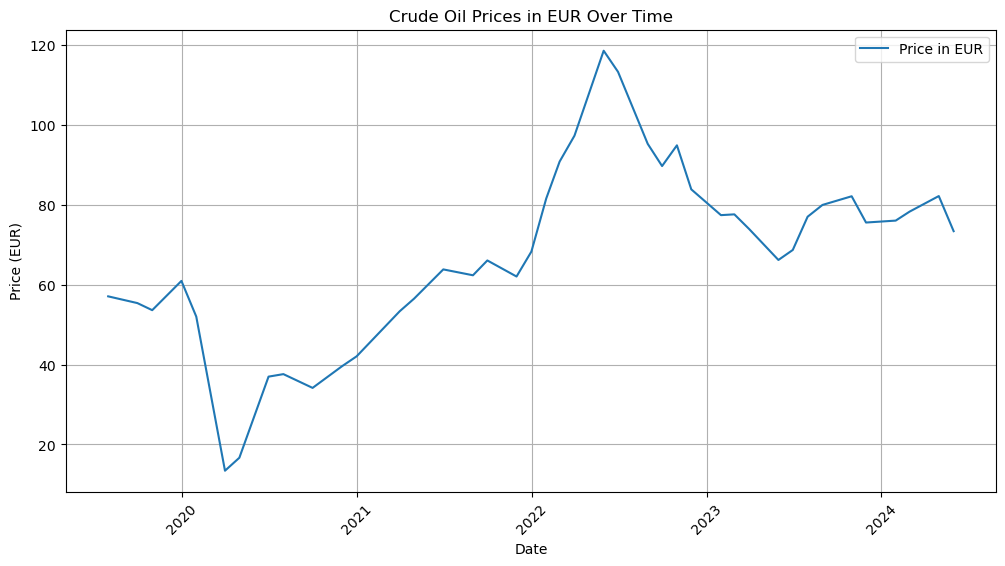

In [101]:
import matplotlib.pyplot as plt

#plot the crude oil prices in EUR over time
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Date'], merged_data['Price_EUR'], label='Price in EUR')
plt.title('Crude Oil Prices in EUR Over Time')
plt.xlabel('Date')
plt.ylabel('Price (EUR)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [102]:
#check for missing values
missing_values = merged_data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Date             0
Exchange_Rate    0
Price_EUR        0
dtype: int64


In [103]:
#get summary statistics
summary_stats = merged_data['Price_EUR'].describe()
print("Summary Statistics for Price in EUR:")
print(summary_stats)

Summary Statistics for Price in EUR:
count     41.000000
mean      67.985408
std       22.830324
min       13.423122
25%       55.425300
50%       68.736162
75%       81.624536
max      118.659609
Name: Price_EUR, dtype: float64


In [105]:
#create lag features
merged_data['Lag_Price'] = merged_data['Price_EUR'].shift(1)

#create a rolling average (e.g., 7-day moving average)
merged_data['Rolling_Mean_7'] = merged_data['Price_EUR'].rolling(window=7).mean()

#display the first few rows to verify new features
print(merged_data.head(10))

        Date  Exchange_Rate  Price_EUR  Lag_Price  Rolling_Mean_7
0 2019-07-31         1.1218  57.113567        NaN             NaN
1 2019-09-30         1.1004  55.425300  57.113567             NaN
2 2019-10-31         1.1053  53.650593  55.425300             NaN
3 2019-12-31         1.1113  60.982633  53.650593             NaN
4 2020-01-31         1.1100  52.045045  60.982633             NaN
5 2020-03-31         1.1063  13.423122  52.045045             NaN
6 2020-04-30         1.0862  16.672804  13.423122       44.187581
7 2020-06-30         1.1255  36.996890  16.672804       41.313770
8 2020-07-31         1.1463  37.625403  36.996890       38.770927
9 2020-09-30         1.1792  34.175712  37.625403       35.988801


In [106]:
#drop rows with NaN values resulting from Lag/Rolling mean operations
merged_data.dropna(inplace=True)

#verify the changes
print(merged_data.head(10))

         Date  Exchange_Rate  Price_EUR  Lag_Price  Rolling_Mean_7
6  2020-04-30         1.0862  16.672804  13.423122       44.187581
7  2020-06-30         1.1255  36.996890  16.672804       41.313770
8  2020-07-31         1.1463  37.625403  36.996890       38.770927
9  2020-09-30         1.1792  34.175712  37.625403       35.988801
10 2020-11-30         1.1838  39.567495  34.175712       32.929496
11 2020-12-31         1.2170  42.087099  39.567495       31.506932
12 2021-03-31         1.1899  53.382637  42.087099       37.215434
13 2021-04-30         1.1979  56.540613  53.382637       42.910836
14 2021-06-30         1.2047  63.866523  56.540613       46.749355
15 2021-08-31         1.1772  62.393816  63.866523       50.287699


#### Standardise the dataset

In [107]:
from sklearn.preprocessing import StandardScaler

#select numeric columns for standardization
numeric_cols = ['Price_EUR', 'Lag_Price', 'Rolling_Mean_7']

#initialize the standard scaler
scaler = StandardScaler()

#fit and transform the numeric columns
merged_data[numeric_cols] = scaler.fit_transform(merged_data[numeric_cols])

#check the first few rows to ensure standardization
print(merged_data.head(10))

         Date  Exchange_Rate  Price_EUR  Lag_Price  Rolling_Mean_7
6  2020-04-30         1.0862  -2.499292  -2.351638       -1.161244
7  2020-06-30         1.1255  -1.569070  -2.215514       -1.299260
8  2020-07-31         1.1463  -1.540303  -1.364175       -1.421382
9  2020-09-30         1.1792  -1.698193  -1.337848       -1.554995
10 2020-11-30         1.1838  -1.451414  -1.482349       -1.701920
11 2020-12-31         1.2170  -1.336093  -1.256497       -1.770239
12 2021-03-31         1.1899  -0.819103  -1.150956       -1.496085
13 2021-04-30         1.1979  -0.674564  -0.677806       -1.222560
14 2021-06-30         1.2047  -0.339261  -0.545524       -1.038214
15 2021-08-31         1.1772  -0.406666  -0.238655       -0.868283


In [108]:
#save the cleaned and transformed dataset
output_filename = 'cleaned_crude_oil_prices.csv'
merged_data.to_csv(output_filename, index=False)

## Load, Explore and Preprocess Regulatory Changes

In [109]:
import pandas as pd

#load the dataset
regulation_changes = pd.read_csv('regulation_changes.csv')

#display the first few rows of the dataset
print(regulation_changes.head())

         Date                           Regulation   \
0  11/07/2024              EU ETS Allowances Update   
1  23/07/2024        Revised CCS Directive Guidance   
2  11/07/2024       Modernisation Fund Disbursement   
3  18/06/2024    Innovation Fund Cleantech Projects   
4  10/06/2024  CO2 Emissions from New Cars and Vans   

                                        Description   
0  Update on the quantity of cancelled EU ETS all...  
1  Updates to the CCS Directive to streamline per...  
2  EU disbursed nearly €3 billion to support 39 e...  
3  The Innovation Fund allocated €173 million to ...  
4  Decrease in CO2 emissions from new cars and va...  


In [110]:
#check the structure and data types of the dataset
print(regulation_changes.info())

#summary statistics (useful for identifying any immediate data issues)
print(regulation_changes.describe(include='all'))

#check for missing values
print(regulation_changes.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          10 non-null     object
 1   Regulation    10 non-null     object
 2   Description   10 non-null     object
dtypes: object(3)
memory usage: 372.0+ bytes
None
              Date               Regulation   \
count           10                        10   
unique           6                        10   
top     11/07/2024  EU ETS Allowances Update   
freq             4                         1   

                                             Description   
count                                                  10  
unique                                                 10  
top     Update on the quantity of cancelled EU ETS all...  
freq                                                    1  
Date            0
Regulation      0
Description     0
dtype: int64


#### Feature engineering - date features and text features

In [111]:
#convert 'Date' column to datetime
regulation_changes['Date'] = pd.to_datetime(regulation_changes['Date'], dayfirst=True)

#extract year and month as separate features
regulation_changes['Year'] = regulation_changes['Date'].dt.year
regulation_changes['Month'] = regulation_changes['Date'].dt.month

#### Text-based features

In [113]:
#print the column names
print(regulation_changes.columns)

Index(['Date', 'Regulation ', 'Description ', 'Year', 'Month'], dtype='object')


In [114]:
#check and strip any whitespace from column names
regulation_changes.columns = regulation_changes.columns.str.strip()

#re-run to verify column names again
print(regulation_changes.columns)

Index(['Date', 'Regulation', 'Description', 'Year', 'Month'], dtype='object')


In [115]:
from sklearn.feature_extraction.text import TfidfVectorizer

#initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=100)  # Adjust feature size as needed

#fit and transform the 'Description' column
description_tfidf = tfidf_vectorizer.fit_transform(regulation_changes['Description'])

#convert TF-IDF matrix to a DataFrame
description_df = pd.DataFrame(description_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

#concatenate TF-IDF features with the main DataFrame
regulation_changes = pd.concat([regulation_changes, description_df], axis=1)

In [116]:
#save the preprocessed regulation changes data to a CSV file
regulation_changes.to_csv('cleaned_regulation_changes.csv', index=False)